In [5]:
pip install kagglehub seaborn


Note: you may need to restart the kernel to use updated packages.


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rajanand/rainfall-in-india")

print("Path to dataset files:", path)

100%|██████████| 187k/187k [00:00<00:00, 249kB/s]

Extracting files...
Path to dataset files: C:\Users\Priyanshi\.cache\kagglehub\datasets\rajanand\rainfall-in-india\versions\2


In [ ]:
import shutil, os

[shutil.copy2(os.path.join(path, file), file) for file in os.listdir(path)]



['district wise rainfall normal.csv', 'rainfall in india 1901-2015.csv']

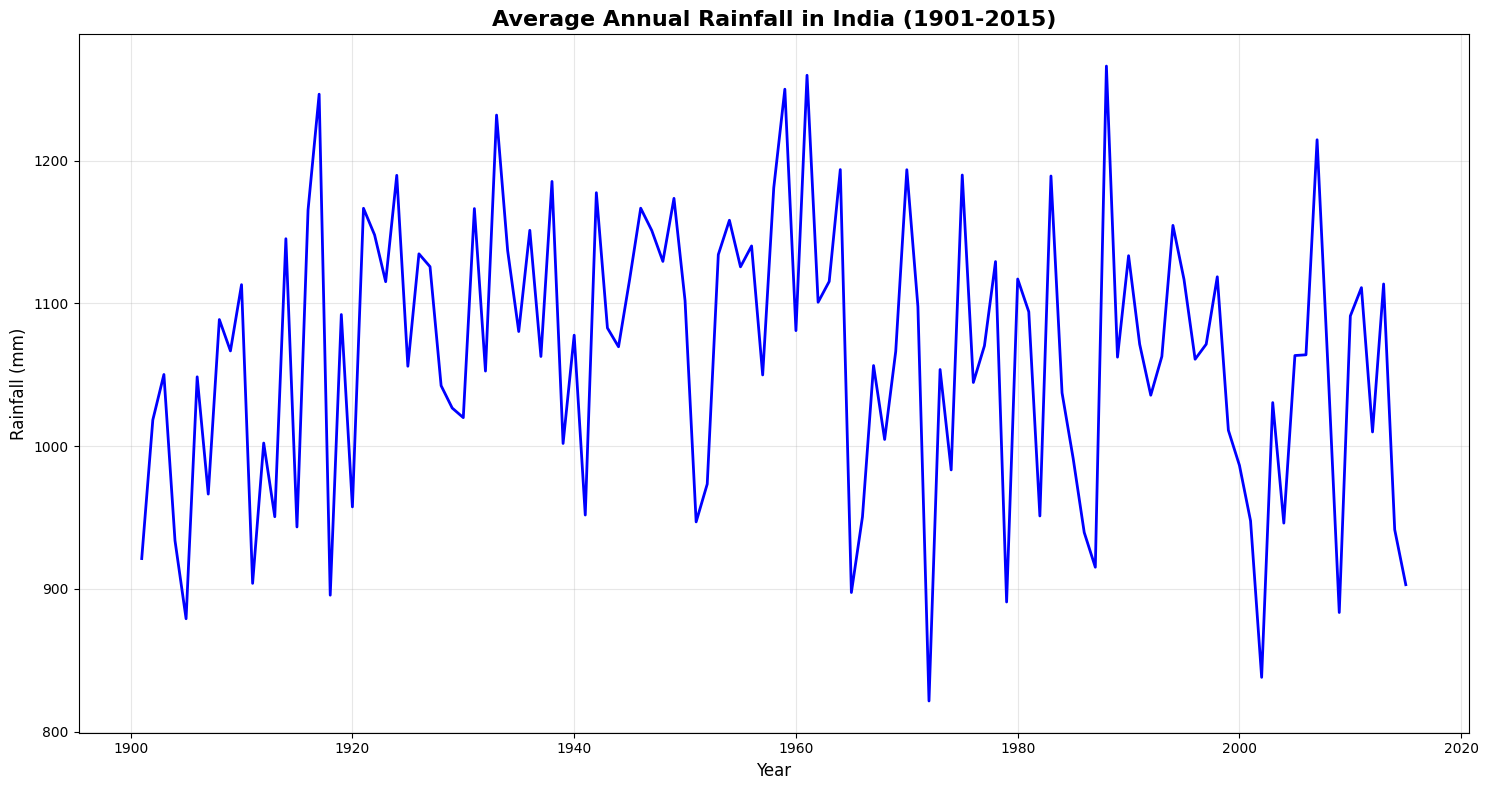

In [2]:
# Load the time series dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("rainfall in india 1901-2015.csv")

# Create the line graph
plt.figure(figsize=(15, 8))
df.groupby('YEAR')['Jun-Sep'].mean().plot(kind='line', color='blue', linewidth=2)

plt.title('Average Annual Rainfall in India (1901-2015)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Rainfall (mm)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [17]:
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
df.head()

Shape: (4116, 19)
Columns: ['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']


,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [1]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("rainfall in india 1901-2015.csv")

# Calculate average rainfall for each column
print("=== AVERAGE RAINFALL BY MONTH/SEASON ===")
print("(Higher values = More flood risk)")

# Get all rainfall columns (exclude SUBDIVISION and YEAR)
rainfall_cols = [col for col in df.columns if col not in ['SUBDIVISION', 'YEAR']]

# Calculate averages for each column
averages = {}
for col in rainfall_cols:
    # Convert to numeric, handle 'NA' values
    numeric_data = pd.to_numeric(df[col], errors='coerce')
    avg = numeric_data.mean()
    averages[col] = avg

# Sort by average rainfall (highest to lowest)
sorted_averages = sorted(averages.items(), key=lambda x: x[1], reverse=True)

print("\nRanked by Average Rainfall (mm):")
for i, (col, avg) in enumerate(sorted_averages, 1):
    print(f"{i:2d}. {col:8s}: {avg:8.1f} mm")

print("\n=== ANALYSIS FOR FLOOD PREDICTION ===")
print("HIGH FLOOD RISK (Keep these columns):")
for col, avg in sorted_averages[:6]:  # Top 6
    print(f"  ✓ {col}: {avg:.1f} mm")

print("\nLOW FLOOD RISK (Consider dropping these columns):")
for col, avg in sorted_averages[-6:]:  # Bottom 6
    print(f"  ✗ {col}: {avg:.1f} mm")

print("\n=== RECOMMENDATION ===")
print("Based on rainfall averages, we should:")
print("1. KEEP: High rainfall months/seasons (flood risk)")
print("2. DROP: Low rainfall months/seasons (no flood risk)")
print("3. FOCUS: On columns with highest averages for flood prediction")

=== AVERAGE RAINFALL BY MONTH/SEASON ===
(Higher values = More flood risk)

Ranked by Average Rainfall (mm):
 1. ANNUAL  :   1411.0 mm
 2. Jun-Sep :   1064.7 mm
 3. JUL     :    347.2 mm
 4. AUG     :    290.3 mm
 5. JUN     :    230.2 mm
 6. SEP     :    197.4 mm
 7. Mar-May :    155.9 mm
 8. Oct-Dec :    154.1 mm
 9. OCT     :     95.5 mm
10. MAY     :     85.7 mm
11. APR     :     43.1 mm
12. Jan-Feb :     40.7 mm
13. NOV     :     39.9 mm
14. MAR     :     27.4 mm
15. FEB     :     21.8 mm
16. JAN     :     19.0 mm
17. DEC     :     18.9 mm

=== ANALYSIS FOR FLOOD PREDICTION ===
HIGH FLOOD RISK (Keep these columns):
  ✓ ANNUAL: 1411.0 mm
  ✓ Jun-Sep: 1064.7 mm
  ✓ JUL: 347.2 mm
  ✓ AUG: 290.3 mm
  ✓ JUN: 230.2 mm
  ✓ SEP: 197.4 mm

LOW FLOOD RISK (Consider dropping these columns):
  ✗ Jan-Feb: 40.7 mm
  ✗ NOV: 39.9 mm
  ✗ MAR: 27.4 mm
  ✗ FEB: 21.8 mm
  ✗ JAN: 19.0 mm
  ✗ DEC: 18.9 mm

=== RECOMMENDATION ===
Based on rainfall averages, we should:
1. KEEP: High rainfall months/seaso

In [3]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("rainfall in india 1901-2015.csv")

print("=== ORIGINAL DATASET ===")
print(f"Original shape: {df.shape}")
print(f"Original columns: {list(df.columns)}")

# Keep only essential columns for flood prediction
essential_cols = ['SUBDIVISION', 'YEAR', 'Jun-Sep', 'ANNUAL']
df_clean = df[essential_cols].copy()

print("\n=== CLEANED DATASET ===")
print(f"New shape: {df_clean.shape}")
print(f"Kept columns: {list(df_clean.columns)}")

print("\n=== FIRST FEW ROWS OF CLEANED DATA ===")
print(df_clean.head())

print("\n=== DATA SUMMARY ===")
print(f"Number of subdivisions: {df_clean['SUBDIVISION'].nunique()}")
print(f"Year range: {df_clean['YEAR'].min()} to {df_clean['YEAR'].max()}")
print(f"Total records: {len(df_clean)}")

# Check for missing values in cleaned dataset
missing_data = df_clean.isnull().sum()
print(f"\nMissing values in cleaned dataset:")
for col, missing in missing_data.items():
    if missing > 0:
        print(f"  {col}: {missing} ({missing/len(df_clean)*100:.1f}%)")

print("\n=== CLEANUP COMPLETE! ===")
print("Now we have a focused dataset with:")
print("  ✓ SUBDIVISION - Geographic regions")
print("  ✓ YEAR - Time dimension")
print("  ✓ Jun-Sep - MONSOON RAINFALL (flood indicator)")
print("  ✓ ANNUAL - Overall context")

=== ORIGINAL DATASET ===
Original shape: (4116, 19)
Original columns: ['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']

=== CLEANED DATASET ===
New shape: (4116, 4)
Kept columns: ['SUBDIVISION', 'YEAR', 'Jun-Sep', 'ANNUAL']

=== FIRST FEW ROWS OF CLEANED DATA ===
                 SUBDIVISION  YEAR  Jun-Sep  ANNUAL
0  ANDAMAN & NICOBAR ISLANDS  1901   1696.3  3373.2
1  ANDAMAN & NICOBAR ISLANDS  1902   2185.9  3520.7
2  ANDAMAN & NICOBAR ISLANDS  1903   1874.0  2957.4
3  ANDAMAN & NICOBAR ISLANDS  1904   1977.6  3079.6
4  ANDAMAN & NICOBAR ISLANDS  1905   1624.9  2566.7

=== DATA SUMMARY ===
Number of subdivisions: 36
Year range: 1901 to 2015
Total records: 4116

Missing values in cleaned dataset:
  Jun-Sep: 10 (0.2%)
  ANNUAL: 26 (0.6%)

=== CLEANUP COMPLETE! ===
Now we have a focused dataset with:
  ✓ SUBDIVISION - Geographic regions
  ✓ YEAR - Time dimension
  ✓ Jun-Sep - 

In [5]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("rainfall in india 1901-2015.csv")

print("=== ORIGINAL DATASET ===")
print(f"Original shape: {df.shape}")

# Keep only essential columns for flood prediction
essential_cols = ['SUBDIVISION', 'YEAR', 'Jun-Sep', 'ANNUAL']
df_clean = df[essential_cols].copy()

print(f"After column selection: {df_clean.shape}")

# STEP 1: Handle missing values
print("\n=== STEP 1: HANDLING MISSING VALUES ===")
print("Missing values before cleaning:")
print(df_clean.isnull().sum())

# Remove rows with any missing values
df_clean = df_clean.dropna()
print(f"After removing missing values: {df_clean.shape}")

# STEP 2: Convert data types
print("\n=== STEP 2: CONVERTING DATA TYPES ===")
df_clean['YEAR'] = pd.to_numeric(df_clean['YEAR'], errors='coerce')
df_clean['Jun-Sep'] = pd.to_numeric(df_clean['Jun-Sep'], errors='coerce')
df_clean['ANNUAL'] = pd.to_numeric(df_clean['ANNUAL'], errors='coerce')

# Remove any rows that couldn't be converted to numeric
df_clean = df_clean.dropna()
print(f"After type conversion: {df_clean.shape}")

# STEP 3: Remove outliers and invalid data
print("\n=== STEP 3: REMOVING OUTLIERS ===")
print("Data ranges before outlier removal:")
print(f"Jun-Sep: {df_clean['Jun-Sep'].min():.1f} to {df_clean['Jun-Sep'].max():.1f} mm")
print(f"ANNUAL: {df_clean['ANNUAL'].min():.1f} to {df_clean['ANNUAL'].max():.1f} mm")

# Remove extreme outliers (values beyond 3 standard deviations)
for col in ['Jun-Sep', 'ANNUAL']:
    mean_val = df_clean[col].mean()
    std_val = df_clean[col].std()
    lower_bound = mean_val - 3 * std_val
    upper_bound = mean_val + 3 * std_val
    
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

print(f"After outlier removal: {df_clean.shape}")

# STEP 4: Sort data chronologically
print("\n=== STEP 4: SORTING DATA ===")
df_clean = df_clean.sort_values(['SUBDIVISION', 'YEAR']).reset_index(drop=True)

# STEP 5: Final data quality check
print("\n=== STEP 5: FINAL DATA QUALITY CHECK ===")
print(f"Final dataset shape: {df_clean.shape}")
print(f"Number of subdivisions: {df_clean['SUBDIVISION'].nunique()}")
print(f"Year range: {df_clean['YEAR'].min()} to {df_clean['YEAR'].max()}")
print(f"Total records: {len(df_clean)}")

print(df_clean.head(10))


=== ORIGINAL DATASET ===
Original shape: (4116, 19)
After column selection: (4116, 4)

=== STEP 1: HANDLING MISSING VALUES ===
Missing values before cleaning:
SUBDIVISION     0
YEAR            0
Jun-Sep        10
ANNUAL         26
dtype: int64
After removing missing values: (4090, 4)

=== STEP 2: CONVERTING DATA TYPES ===
After type conversion: (4090, 4)

=== STEP 3: REMOVING OUTLIERS ===
Data ranges before outlier removal:
Jun-Sep: 57.4 to 4536.9 mm
ANNUAL: 62.3 to 6331.1 mm
After outlier removal: (3996, 4)

=== STEP 4: SORTING DATA ===

=== STEP 5: FINAL DATA QUALITY CHECK ===
Final dataset shape: (3996, 4)
Number of subdivisions: 36
Year range: 1901 to 2015
Total records: 3996
                 SUBDIVISION  YEAR  Jun-Sep  ANNUAL
0  ANDAMAN & NICOBAR ISLANDS  1901   1696.3  3373.2
1  ANDAMAN & NICOBAR ISLANDS  1902   2185.9  3520.7
2  ANDAMAN & NICOBAR ISLANDS  1903   1874.0  2957.4
3  ANDAMAN & NICOBAR ISLANDS  1904   1977.6  3079.6
4  ANDAMAN & NICOBAR ISLANDS  1905   1624.9  2566.7